In [4]:
from PIL import Image
import numpy as np
import os
from soview import *
import shutil
import os
import gc
def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)







In [5]:
tiff_path = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/imc/jackson2020the/OMEnMasks/ome'
h5ad_path = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/imc/jackson2020the/OMEnMasks/h5ad'
# sample = 'SCC_051219_2048_800um_1x_7ms_3.4nA_17points_Run-12_FOV10.tiff'

In [3]:
for sample in os.listdir(tiff_path):
    if 'Point' not in sample:
        continue
    data_path = f'{tiff_path}/{sample}'
    tiff_list = []
    protein_list = []
    for protein_file in os.listdir(data_path):
        if 'tif' not in protein_file:
            continue
        protein = protein_file.split('.tif')[0]
        cur_tiff = read_tiff(f'{data_path}/{protein_file}')
        cur_tiff = cur_tiff.reshape(cur_tiff.shape[1],cur_tiff.shape[1],1)
        tiff_list.append(cur_tiff)
        protein_list.append(protein)
    tiff_mat = np.concatenate(tiff_list,axis=2)

    sz = tiff_mat.shape[0]
    spatialmat_list = []
    for i in range(sz):
        for j in range(sz):
            spatialmat_list.append([i,j])
    spatial_mat = np.array(spatialmat_list)

    adata = ad.AnnData(X=tiff_mat.reshape(-1,tiff_mat.shape[2]))
    adata.var_names = protein_list
    adata.obsm['spatial'] = spatial_mat
    adata.write_h5ad(f'{h5ad_path}/{sample}.h5ad')
    print(sample)



/tmp/ipykernel_1489/1390107639.py:30: FutureWarning: X.dtype being converted to np.float32 from uint16. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=tiff_mat.reshape(-1,tiff_mat.shape[2]))


20180527_1508_1565_Run-11_Point4
20180527_1508_1565_Run-11_Point6
20180510_1508_1565_Run-10_Point4
20180527_1508_1565_Run-11_Point2
20180527_1508_1565_Run-11_Point8
20180510_1508_1565_Run-10_Point2
20180510_1508_1565_Run-10_Point8
20180510_1508_1565_Run-10_Point6


In [16]:
adata.shape

(4194304, 45)

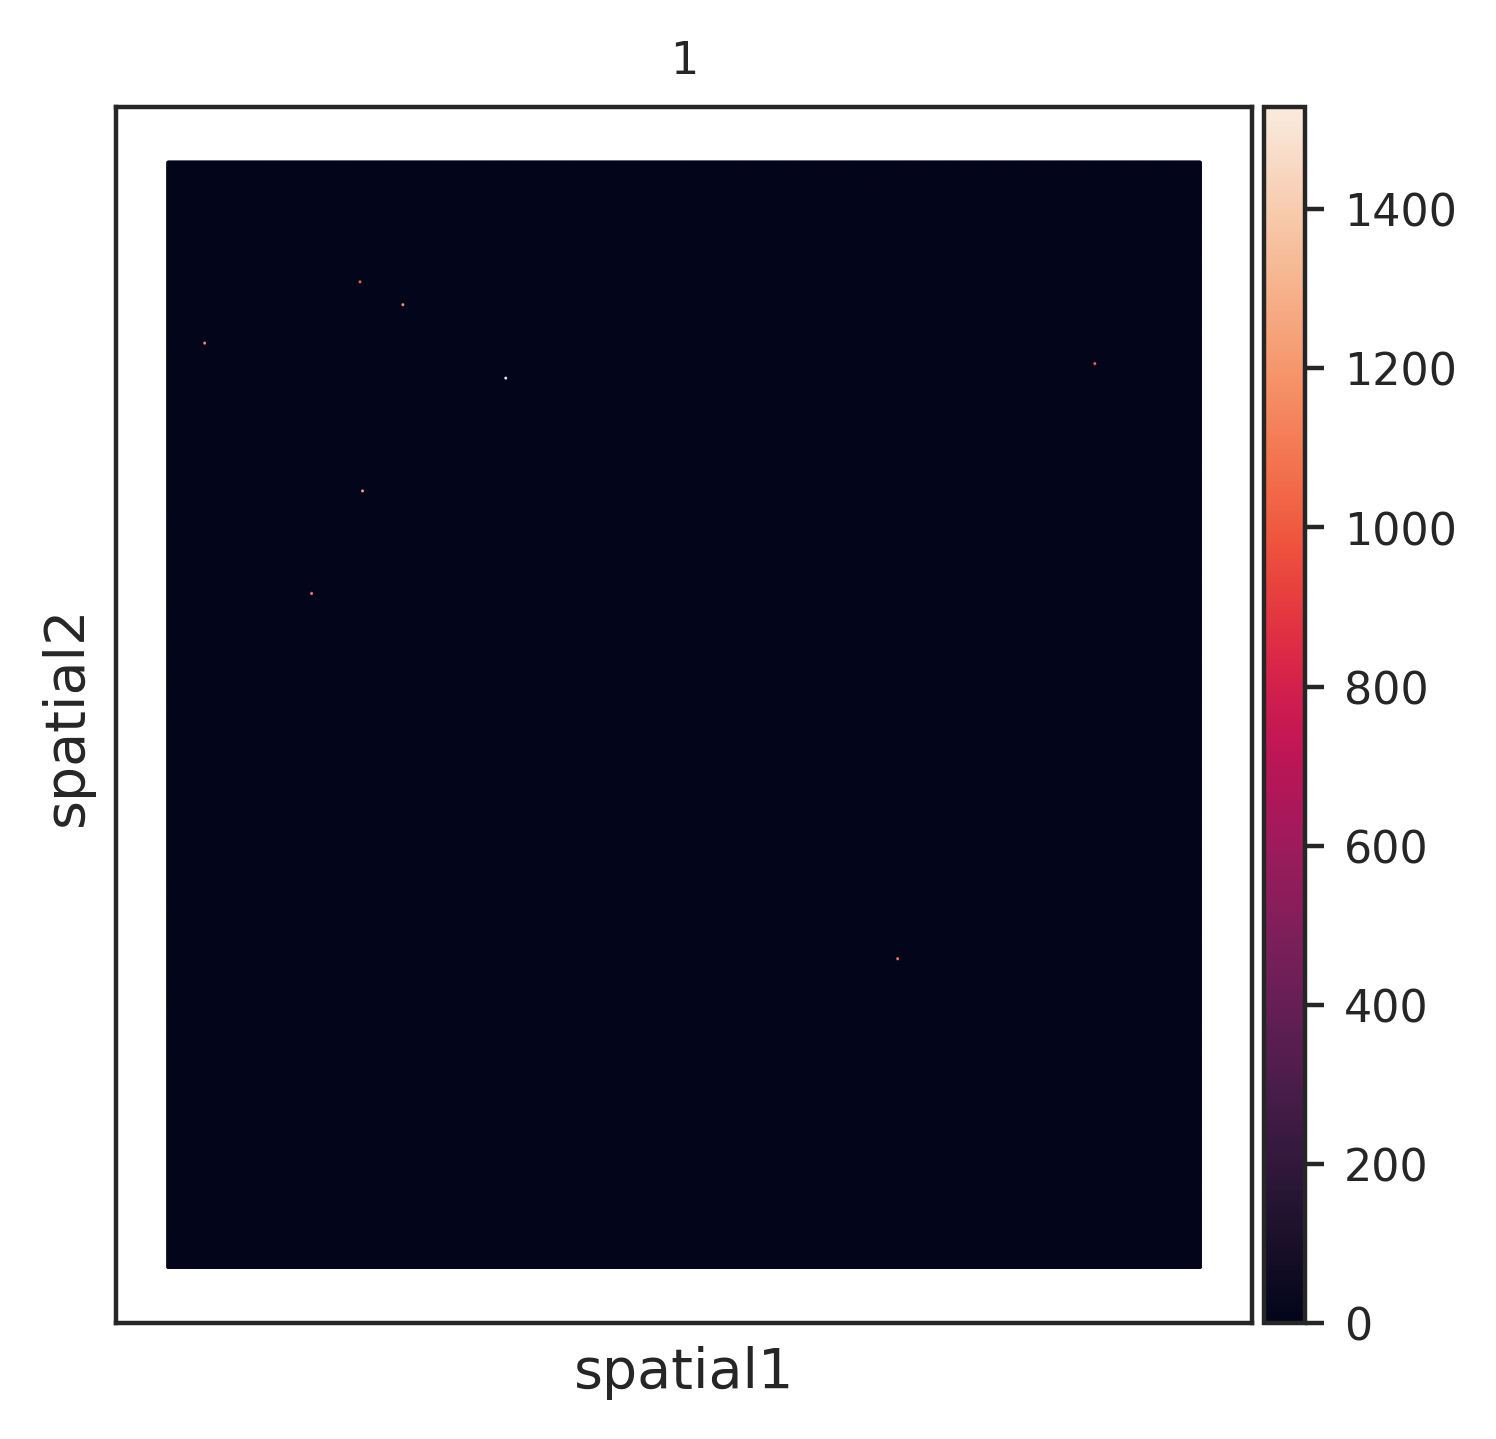

In [15]:
sc.pl.embedding(adata,basis='spatial',color='1',size=1)